# ДЗ 2 неделя

## Подключение библиотек

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка файла

In [8]:
df = pd.read_csv("data.csv", encoding="cp1251")

## Настройки

In [9]:
inputs = False
for i in range(0, df.shape[0] - 1, 3):
    df.loc[i, "Покупательская активность"] = "Прежний уровень"

## Первое задание

Необходимо сделать:

1) Перевести название колонок в стандарт PEP8:

- перевести в нижний регистр
- пробелы между словами заменить на _
- язык сохранить - кириллица

2) Рассчитать основные статистики для категориальных данных с помощью функции describe().
3) На экран вывести результат в виде таблицы DataFrame. Индексами сделать названия факторов.

### Привод колонок к формату **PEP8**

In [10]:
df.columns = df.columns.str.replace(" ", "_")  # замена пробелов
df.columns = df.columns.str.lower()  # нижний регистр
df

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,выручка_от_клиента_текущий_месяц,разность_выручки_тек_прошлый_месяц,ошибка_сервиса,страниц_за_визит,всего_минут_текущем_месяце,всего_минут_предыдущий_месяц
0,Прежний уровень,премиум,да,4,689,0.24,Домашний текстиль,2,4707,-985,4,4,8,10
1,Снизилась,премиум,да,2,980,0.98,Техника для красоты и здоровья,3,4751,-1070,7,5,8,14
2,Снизилась,премиум,нет,5,931,0.32,Косметика и аксесуары,4,4607,-538,3,4,5,7
3,Прежний уровень,стандарт,нет,4,574,0.99,Техника для красоты и здоровья,1,4182,-663,2,2,12,10
4,Снизилась,стандарт,да,4,511,0.93,Домашний текстиль,3,4484,-44,3,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Прежний уровень,премиум,да,4,648,0.21,Косметика и аксесуары,1,4978,-398,4,6,9,10
301,Снизилась,премиум,да,1,795,0.29,Домашний текстиль,2,4986,-942,7,6,10,10
302,Снизилась,стандарт,да,5,388,0.23,Мелкая бытовая техника и электроника,2,4530,-258,6,2,8,5
303,Прежний уровень,стандарт,нет,4,561,0.98,Товары для детей,1,4595,-537,5,2,10,11


### Описываем данные

In [11]:
df[[
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]].describe().T  # ответ на первую задачу

,count,unique,top,freq
покупательская_активность,305,2,Снизилась,203
тип_сервиса,305,2,стандарт,185
разрешить_сообщать,305,2,да,231
популярная_категория,305,6,Косметика и аксесуары,69


## Второе задание

Необходимо сделать:
1) Рассчитать основные статистики для фактора "разность_выручки_тек_прошлый_месяц" с помощью функции describe(). При этом расчёт произвести по группам фактора "покупательская_активность."
2) На экран вывести результат в виде таблицы DataFrame. Перевести в целочисленный тип.

In [12]:
df.groupby('покупательская_активность')[
    "разность_выручки_тек_прошлый_месяц"
].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
покупательская_активность,,,,,,,,
Прежний уровень,102,-503,335,-1231,-751,-500,-333,261
Снизилась,203,-496,327,-1270,-738,-506,-257,265


## Третье задние

Необходимо:
Построить простую гистограмму, не изменяя настройки по умолчанию, по столбцу, название которого вводится. Гарантируется, что будет введено название столбца с числовым типом.
Сохраните гистограмму в файл target_2_3.png.

### Ввод колонны

In [13]:
if inputs:
    col = input().lower().replace(" ", "_")
else: 
    col = "выручка_от_клиента_текущий_месяц"

### Гистограмма

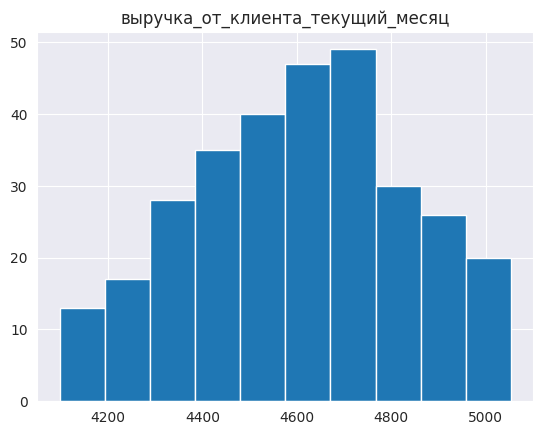

In [14]:
_plot = df[col].plot.hist()
_plot.set_title(col)
_plot.grid(True)
_plot.set_ylabel("")

plt.savefig('target_2_3.png')
plt.show()

## Четвёртое задание

Необходимо:
Построить график плотности вероятности для факторов в количественной шкале с использованием библиотеки seaborn. При построении учесть:
- построить график по столбцу, название которого вводится 
- на одном графике строить плотности вероятности по каждой группе из фактора покупательская_активность
- Настроить только один параметр: наличие цветности под кривой плотности. А сами цвета - оставить по умолчанию

Сохраните гистограмму в файл target_2_4.png.

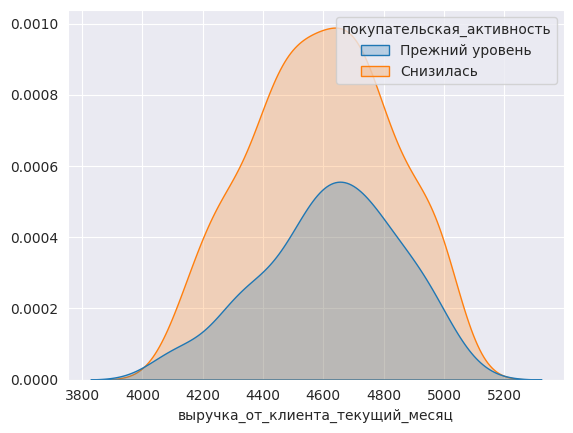

In [15]:
sns.kdeplot(data=df, x=col, hue='покупательская_активность', fill=True)
plt.ylabel("")
plt.savefig('target_2_4.png')
plt.show()

## Пятое задание

В этой задаче необходимо сделать:
Построить график круговой диаграммы для факторов в категориальной шкале. При построении учесть:
- построить график по столбцу, название которого вводится
- доли категорий вывести на графике в формате процента с одним знаком после запятой
- на графике вывести название категорий
- остальные параметры оставить по умолчанию

Сохраните диаграмму в файл target_2_5.png.

### Ввод колонны

In [16]:
if inputs:
    col = input().lower().replace(" ", "_")
else: 
    col = "покупательская_активность"

### Круговая диаграмма

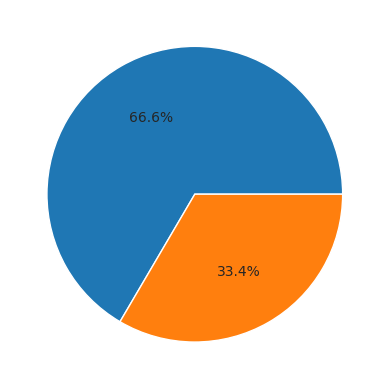

In [17]:
percentage = df[col].value_counts(normalize=True)
plt.pie(percentage, autopct='%1.1f%%')
plt.savefig('target_2_5.png')
plt.show()

## Шестое задание

В этой задаче необходимо сделать:
1) Создать новую категориальную переменную категории_товаров на основе фактора популярная_категория

    - Товары для детей обозначить как покупки для детей
    - Домашний текстиль, Кухонная посуда, Мелкая бытовая техника и электроника обозначить как покупки для быта
    - Косметика и аксессуары , Техника для красоты и здоровья обозначить как покупки для себя

2) Сформировать новый датасет, в котором будут только клиенты, совершившие покупки для быта
3) Рассчитать основные статистики для фактора "разность_выручки_тек_прошлый_месяц" с помощью функции describe(). При этом расчёт произвести группам покупательская_активность
4) Перевести в целочисленный тип. На экран вывести результат в виде таблицы DataFrame.

### Новая шкала

In [18]:
df["категории_товаров"] = df["популярная_категория"].apply(
    lambda x:
        "покупки для детей" if x == "Товары для детей" else (
            "покупки для быта" if (x == "Домашний текстиль" or x == "Кухонная посуда"
                                   or x == "Мелкая бытовая техника и электроника") else (
                "покупки для себя" if (x == "Косметика и аксесуары" or x == "Техника для красоты и здоровья") else (
                    pd.NA
                )
            )
        )
)
df[["популярная_категория", "категории_товаров"]].head(5)

,популярная_категория,категории_товаров
0,Домашний текстиль,покупки для быта
1,Техника для красоты и здоровья,покупки для себя
2,Косметика и аксесуары,покупки для себя
3,Техника для красоты и здоровья,покупки для себя
4,Домашний текстиль,покупки для быта


### Описание нового датасета

In [19]:
data = df[df["категории_товаров"] == "покупки для быта"]
data.groupby("покупательская_активность")["разность_выручки_тек_прошлый_месяц"].describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
покупательская_активность,,,,,,,,
Прежний уровень,55,-524,319,-1231,-831,-503,-333,227
Снизилась,111,-486,352,-1270,-740,-500,-252,265
